In [2]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [72]:
data = pd.read_csv('./data/improved_profiles_26_04_2021.csv')

In [74]:
data['gender'] = data['gender'].fillna("undefined")

In [75]:
data.head(3)

,name,location,languages,description,rating,nb_reviews,price,skills,expertise,nb_projects,nb_buyers,last_active,gender
0,Maria H.,"Sheffield, United Kingdom",English speaking,We are a small UK based company speciaIising i...,4.9,4694,£25,"['animation', 'graphics design', 'brand design...","Industry expertise: IT, Internet, Marketing, M...",7672,4168,Apr 26 2021,female
1,Cormac Reynolds,"City of London, United Kingdom",English speaking,Looking for a link building solution or some g...,5.0,1190,£100,"['online marketing', 'link building', 'marketi...",NaN,1085,533,Apr 25 2021,undefined
2,Denise Toepel,"Cuenca, Ecuador","English, Spanish and French speaking",I am a Translation Specialist. I work in publ...,0.0,0,£20,"['English translation', 'French <=> English', ...",Industry expertise: Education and Telecommunic...,0,0,Apr 25 2021,female


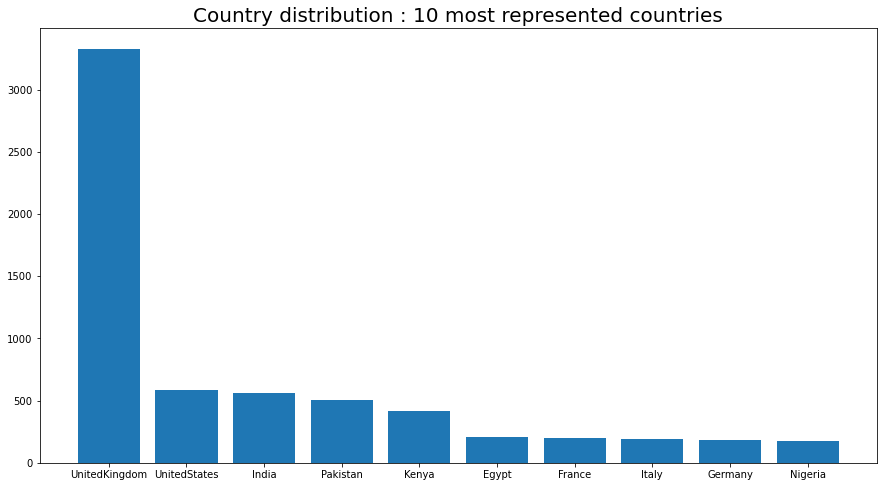

In [5]:
location = data['location']

country = [ l.split(',')[-1].replace(" ", "") for l in location ]
count = Counter(country).most_common(10)

figure = plt.figure(figsize=(15,8))
keys = [count[i][0] for i in range(len(count))]
values = [count[i][1] for i in range(len(count))]
plt.bar(keys, values)
plt.title("Country distribution : 10 most represented countries", fontsize = 20)
plt.show()

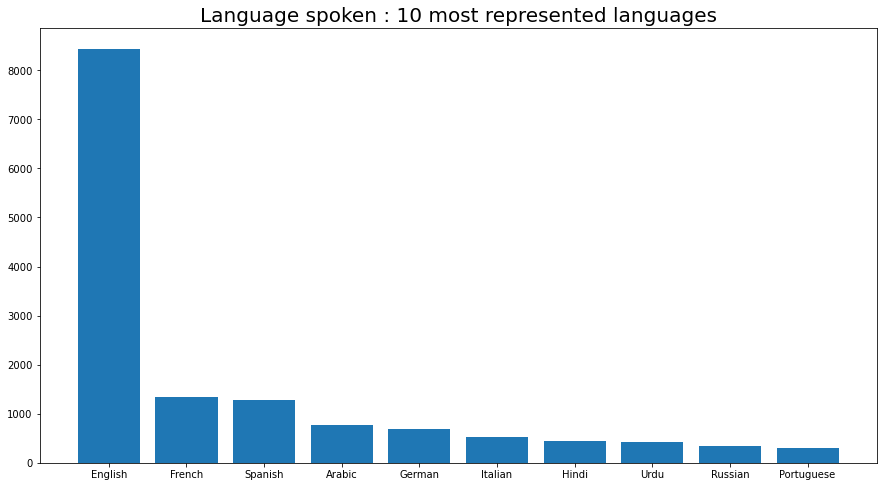

In [6]:
from collections import Counter
import re

speaking = data['languages']
language = []
for s in speaking :
    zeub = str(s).replace("speaking", "").replace("and", "").replace("nan", "")
    zanzi = re.findall(r"[\w']+", zeub)
    for l in zanzi :
        language.append(l)
    
count = Counter(language).most_common(10)

figure = plt.figure(figsize=(15,8))
keys = [count[i][0] for i in range(len(count))]
values = [count[i][1] for i in range(len(count))]
plt.bar(keys, values)
plt.title("Language spoken : 10 most represented languages", fontsize = 20)
plt.show()

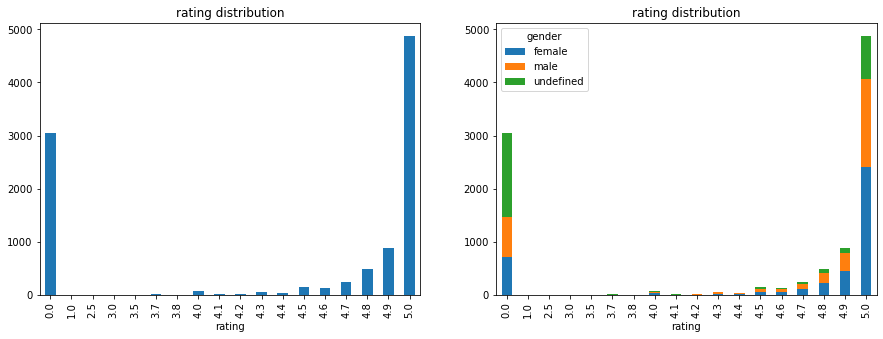

Number of workers with null rating : 3052
Number of workers with inactive profiles (no projects and null rating) : 2930


In [114]:
fig, axes = plt.subplots(nrows=1, ncols=2)

plt_rating = data.groupby('rating')['rating'].count()
plt_rating.plot(kind='bar', figsize=(15,5), ax=axes[0], title = "rating distribution")

plt_rating_gender = data.groupby(['gender', 'rating'])['rating'].count().unstack('gender').fillna(0)
plt_rating_gender.plot(kind='bar', stacked=True, figsize=(15,5), ax=axes[1], title = "rating distribution")

plt.show()

print('Number of workers with null rating :', len(data.loc[(data['rating'] == 0)]))
print('Number of workers with inactive profiles (no projects and null rating) :',  len(data.loc[(data['rating'] == 0) & (data['nb_projects'] == 0)]))

All the workers have good grades. Only a minority of them has a rating lower than 4.9 as the null rating are only inactive profiles

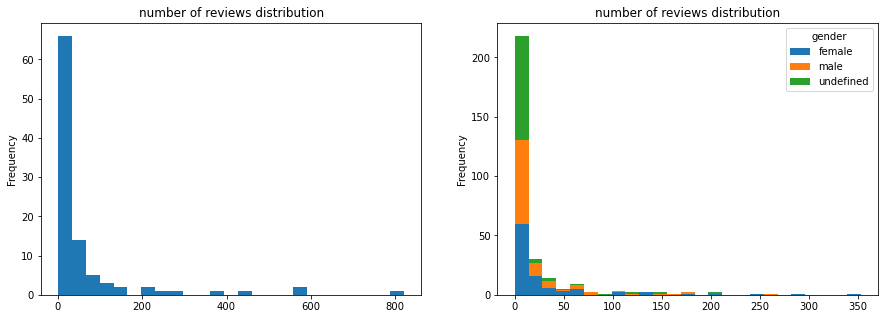

Proportion of active profiles with more than 100 reviews :  8.41 %


In [157]:
fig, axes = plt.subplots(nrows=1, ncols=2)

plt_reviews = data.loc[(0<data['nb_reviews']) & (data['nb_reviews']<100)].groupby('nb_reviews')['nb_reviews'].count()
plt_reviews.plot(kind='hist', bins = 25, figsize=(15,5), ax=axes[0], title = "number of reviews distribution")

plt_reviews_gender = data.loc[(0<data['nb_reviews']) & (data['nb_reviews']<100)].groupby(['gender', 'nb_reviews'])['nb_reviews'].count().unstack('gender').fillna(0)
plt_reviews_gender.plot(kind='hist', bins = 25, stacked = True, figsize=(15,5), ax=axes[1], title = "number of reviews distribution")

plt.show()

print("Proportion of active profiles with more than 100 reviews : ", 100 * 
      round(len(data.loc[(0<data['nb_reviews']) & (data['nb_reviews']>100)]['nb_reviews'])/
            len(data.loc[(0<data['nb_reviews'])]['nb_reviews']),4), "%")

Of all the active profiles, we can see that the mast majority has only few feedbacks. There are several profiles with a lot of reviews

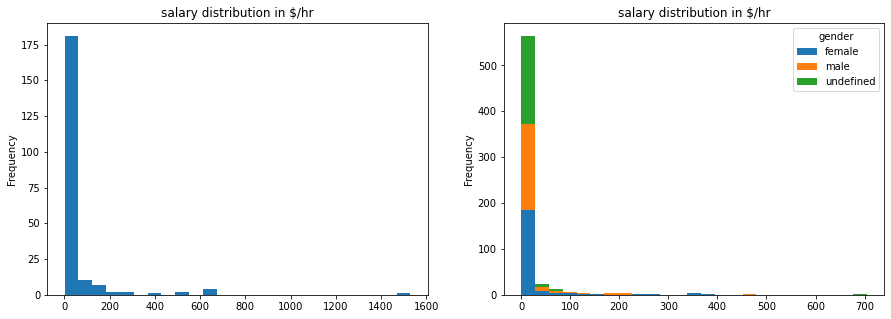

In [159]:
# put everything in dollars
salary = []
for i in range(len(data["price"])) :
    curr = data["price"][i][0]
    if curr == '£':
        salary.append(round(1.2 * float(data["price"][i][1:]),2))
    elif curr == '€':
        salary.append(round(1.38 * float(data["price"][i][1:]),2))
    else: 
        salary.append(float(data["price"][i][1:]))

data['salary'] = salary

fig, axes = plt.subplots(nrows=1, ncols=2)

plt_salary = data.groupby('salary')['salary'].count()
plt_salary.plot(kind='hist', bins = 25, figsize=(15,5), ax=axes[0], title = "salary distribution in $/hr")

plt_salary_gender = data.groupby(['gender', 'salary'])['salary'].count().unstack('gender').fillna(0)
plt_salary_gender.plot(kind='hist', bins = 25, stacked = True, figsize=(15,5), ax=axes[1], title = "salary distribution in $/hr")

plt.show()

(-11.077192266135112, 11.00367582219691, -11.27664201345355, 11.11672698918955)

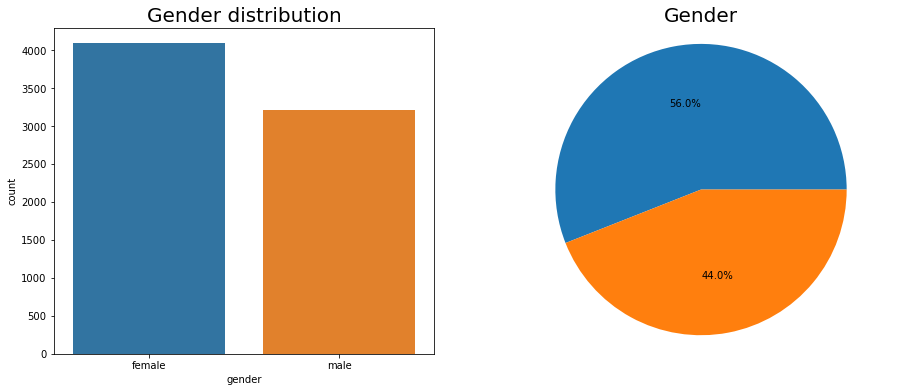

In [35]:
figure = plt.figure(figsize=(15,6))

axes = figure.add_subplot(121)
sns.countplot(x='gender', data=data)
plt.title("Gender distribution", color="black", fontsize = 20)


axes = figure.add_subplot(122)
axes.pie(data["gender"].value_counts(),radius = 10, autopct='%1.1f%%', textprops=dict(color="black"))
plt.title("Gender", color="black", fontsize = 20)
axes.axis('equal')

In [82]:
skills_list = []
for d in data['skills']:
    norm = d.replace("[", "").replace("]", "").replace("'", "").split(',')
    for s in norm :
        skills_list.append(s[1:])
        
print('There are', len(Counter(skills_list)), 'different skills listed by the workers \n')
print('The most common are : \n', Counter(skills_list).most_common(10))

There are 2897 different skills listed by the workers 

The most common are : 
 [('content writing', 3769), ('blog writing', 2941), ('Copywriting', 2378), ('creative writing', 2054), ('proofreading', 1800), ('research writing', 1413), ('roofreading', 1317), ('search engine optimization (seo)', 1289), ('diting', 1258), ('English translation', 1198)]


In [83]:
expert_list = []
for d in data[data['expertise'].notna()]['expertise']:
    norm = d.replace("Industry expertise:", "").split(',')
    for e in norm :
        expert_list.append(e[1:])
    
print('There are', len(Counter(expert_list)), 'different expertises listed by the workers \n')
print('The most common are : \n', Counter(expert_list).most_common(10))

There are 849 different expertises listed by the workers 

The most common are : 
 [('Education', 1693), ('Advertising', 1384), ('Marketing', 1231), ('IT', 819), ('Entertainment', 789), ('Art', 767), ('Internet', 679), ('Financial Services', 621), ('Healthcare', 561), ('Media', 461)]
